In [19]:
%tensorflow_version 2.x


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [20]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [21]:
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)

In [22]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [23]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,3]

# The numer of elements in the reshaped tensor MUST match the number in the original

In [8]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [24]:
!pip install -q sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [11]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [12]:
print(dftrain.head())

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [13]:
dftrain.describe()
dftrain.shape

(627, 9)

Text(0.5, 0, '% survive')

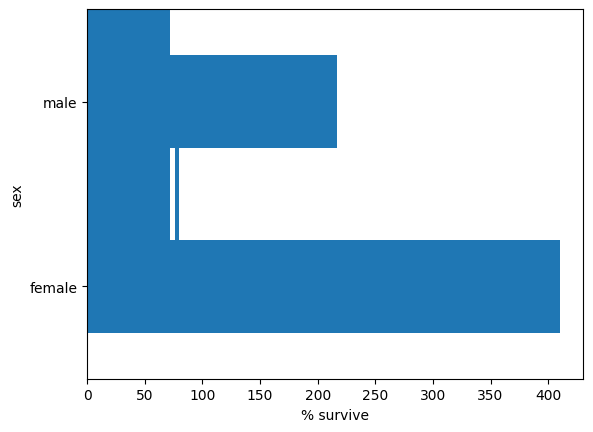

In [14]:
dftrain.age.hist(bins=20)
dftrain.sex.value_counts().plot(kind='barh')
dftrain['class'].value_counts().plot(kind='barh')
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [15]:
#CATEGORICAL string data

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [16]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds
  return input_function

In [17]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

# **LINEAR REGRESSION**
Now lets Add the linear model from tensor flow ("y=mx+c") use estiamatior and pass your features. An estiamtor is basically are Algos in tensor flow. Change labels to increase the accuracy.

In [20]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
# get model metrics/stats by testing on tetsing data
result = linear_est.evaluate(eval_input_fn)

clear_output()
#accuracy is alwways changed because data is shuffled
print(result['accuracy'])
print(result)

0.7537879
{'accuracy': 0.7537879, 'accuracy_baseline': 0.625, 'auc': 0.8159167, 'auc_precision_recall': 0.8003354, 'average_loss': 0.50211364, 'label/mean': 0.375, 'loss': 0.49460042, 'precision': 0.6666667, 'prediction/mean': 0.4357435, 'recall': 0.68686867, 'global_step': 200}


Use the model for predict which typically new data to the model.

In [25]:
 pred_dicts = list(linear_est.predict(eval_input_fn))
 print(pred_dicts)
 print(pred_dicts[0]['probabilities'])


[{'logits': array([-1.8014423], dtype=float32), 'logistic': array([0.14167559], dtype=float32), 'probabilities': array([0.85832435, 0.14167558], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.02273497], dtype=float32), 'logistic': array([0.5056835], dtype=float32), 'probabilities': array([0.4943165, 0.5056835], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.8555351], dtype=float32), 'logistic': array([0.86477566], dtype=float32), 'probabilities': array([0.13522433, 0.8647757 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.5114882], dtype=floa

# **MOVING TO CLASSIFICATION**


In [26]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [27]:
train.head()
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()
train.shape


(120, 4)

In [28]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

In [31]:
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


For classification tasks there are variety of different estimators/models that we can pick from. Some options are listed below.
- DNNClassifier (Deep Neural Network):
1. **Input Layer:** Takes input features \(\mathbf{x}\).
2. **Hidden Layers:** Multiple layers of neurons, each performing:
$$h^{(l)} = \sigma(\mathbf{W}^{(l)} h^{(l-1)} + \mathbf{b}^{(l)})$$$$h^{(l)} = \sigma(\mathbf{W}^{(l)} h^{(l-1)} + \mathbf{b}^{(l)})$$



   where:
    $$

-   $$(h^{(l)}) \text{ is the output of the} (l^{th}) \text{hidden layer.}$$  

-   $$(\mathbf{W}^{(l)}) \text{ is the weight matrix for the} (l^{th}) \text{hidden layer.}$$
-   $$(\mathbf{h}^{(l-1)})  \text{ is the output of the previous hidden layer (or the input layer for the first hidden layer).} $$
-  $$(\mathbf{b}^{(l)}) \text{is the bias vector for the } (l^{th}) \text{ hidden layer.}$$
- sigma is the activation function.  $$
  $$
3. **Output Layer:** Produces the final predictions:
   $$[ \hat{\mathbf{y}} = \text{softmax}(\mathbf{W}^{(L)} \mathbf{h}^{(L-1)} + \mathbf{b}^{(L)}) ]$$
   for multi-class classification, where \(L\) is the last layer.
**Loss Function:**
$$[ J(\mathbf{W}, \mathbf{b}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c}) ]$$
where \(C\) is the number of classes, \(m\) is the number of examples, and $$(\hat{y}_{i,c})$$ is the predicted probability for class \(c\).

- LinearClassifier
the decision boundary as a linear combination of input features.
$$[ \hat{y} = \text{softmax}(\mathbf{W}^\top \mathbf{x} + \mathbf{b}) ]$$
for multi-class classification.

- $$(\mathbf{W}) \text{ is the weight matrix }.$$
- $$(\mathbf{b}) $$
- $$(\mathbf{x}) \text{ is the input feature vector. }$$

**Loss Function:**
For multi-class classification, the cross-entropy loss is used:
$$[ J(\mathbf{W}, \mathbf{b}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c}) ]$$
We can choose either model but the DNN seems to be the best choice. This is because we may not be able to find a linear coorespondence in our data.


In [35]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

In [38]:
# labda to make func inside func as before so inp become an object
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

Instructions for updating:
Use standard file utilities to get mtimes.


In [39]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.933



In [40]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

Please type numeric values as prompted.
SepalLength: 4.8
SepalWidth: 3.2
PetalLength: 1.7
PetalWidth: 1.7


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


Prediction is "Versicolor" (41.0%)


In [1]:
%tensorflow_version 2.x
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade
import tensorflow_probability as tfp
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires cloudpickle>=2.0.0, but you have cloudpickle 1.1.1 which is incompatible.
dask 2023.8.1 requires cloudpickle>=1.5.0, but you have cloudpickle 1.1.1 which is incompatible.
distributed 2023.8.1 requires cloudpickle>=1.5.0, but you have cloudpickle 1.1.1 which is incompatible.
dopamine-rl 4.0.9 requires tensorflow-probability>=0.13.0, but you have tensorflow-probability 0.8.0rc0 which is incompatible.
gym 0.25.2 requires cloudpickle>=1.2.0, but you have cloudpickle 1.1.1 which is incompatible.




1.   Cold days are encoded by a 0 and hot days are encoded by a 1.
2.   The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

In [2]:
tfd = tfp.distributions
initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above


In [4]:
#The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

In [5]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[11.999999 11.1      10.830001 10.748999 10.724699 10.71741  10.715222]


##Sources

1. Chen, James. “Line Of Best Fit.” Investopedia, Investopedia, 29 Jan. 2020, www.investopedia.com/terms/l/line-of-best-fit.asp.
2. “Tf.feature_column.categorical_column_with_vocabulary_list.” TensorFlow, www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable.
3. “Build a Linear Model with Estimators &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/estimator/linear.
4. Staff, EasyBib. “The Free Automatic Bibliography Composer.” EasyBib, Chegg, 1 Jan. 2020, www.easybib.com/project/style/mla8?id=1582473656_5e52a1b8c84d52.80301186.
5. Seif, George. “The 5 Clustering Algorithms Data Scientists Need to Know.” Medium, Towards Data Science, 14 Sept. 2019, https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68.
6. Definition of Hidden Markov Model, http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html.
7. “Tfp.distributions.HiddenMarkovModel &nbsp;: &nbsp; TensorFlow Probability.” TensorFlow, www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel.